## Analysis of socioeconomic data of students from Grupo-PróEstudar 2019 (In progress)

###### This is a real project in progress in order to study the correlation between the students' performance of the test for enrolling in a preparatory course offered by a  volunteer organization and their socioeconomic data. That course has the goal of preparing students for the college entrance exam in Brazil.

In [25]:
%matplotlib notebook
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'Data GPE2019 Analysis .ipynb',
 'Desempenho X Cultura (final).xlsx']

In [26]:
survey = pd.ExcelFile("Desempenho X Cultura (final).xlsx").parse("DesempenhoXFatores")
survey.head()


,Nome,Categoria,Acertos,Acertos ( %),Escola_Ensino_Médio,Cor_Raça,Qual_renda_média _mensal_família,Quantos_livros_média_le_ano,frequência_teatro_cinema,Você_costuma _visitar _museus,"Você possui um espaço próprio e exclusivo (por exemplo, seu quarto) para se dedicar aos estudos?",Leitura Anual
0,Adinan Augusto Peres Canossa,P2,17,0.226667,José Inocêncio da Costa,Branca,"Entre R$ 2000,00 e R$ 3000,00",1 a 2,3 a 4 vezes por mês,Não tenho esse costume,Sim,Menos de 2
1,ADRIELI ALEIXO RIBEIRO,P1,26,0.346667,Henrique Morato,Parda,"Entre R$ 1000,00 e R$ 2000,00",3 a 4,Menos que 1 vez por mês,Não tenho esse costume,Sim,Mais de 2
2,Adrielly Fernanda Buzeti,P1,21,0.280000,Jardim Buscardi,Parda,"Entre R$ 2000,00 e R$ 3000,00",3 a 4,Menos que 1 vez por mês,Vou 1 vez por ano,Sim,Mais de 2
3,Alan Neves de Melo,P1,48,0.640000,Adelino Bordignon,Branca,"Entre R$ 3000,00 e R$ 4000,00",3 a 4,Menos que 1 vez por mês,Conheço ou visitei museus apenas por excursões...,Sim,Mais de 2
4,Aline Haints Pastreli,P1,35,0.466667,Adelino Bordignon,Branca,"Entre R$ 2000,00 e R$ 3000,00",Mais do que 4,1 a 2 vezes por mês,Não tenho esse costume,Sim,Mais de 2


### Cleaning and Transforming Data

In [27]:
Nullvalues = survey.isnull()
True in Nullvalues
# We can conclude we don't have Nan(not a number) and None values in the dataset

False

In [28]:
survey.columns

Index(['Nome', 'Categoria', 'Acertos', 'Acertos ( %)', 'Escola_Ensino_Médio',
       'Cor_Raça', 'Qual_renda_média _mensal_família',
       'Quantos_livros_média_le_ano', 'frequência_teatro_cinema',
       'Você_costuma _visitar _museus',
       'Você possui um espaço próprio e exclusivo (por exemplo, seu quarto) para se dedicar aos estudos?',
       'Leitura Anual'],
      dtype='object')

In [29]:
survey.rename(columns = {'Acertos ( %)': "Acertos (%)", 'Escola_Ensino_Médio': "Escola", 'Qual_renda_média _mensal_família': "Renda Média(Mês)",
                        'Quantos_livros_média_le_ano': 'Leitura Anual (1 a 2)', 'Você_costuma _visitar _museus': "Visita em Museus",
                        'Você possui um espaço próprio e exclusivo (por exemplo, seu quarto) para se dedicar aos estudos?': "Espaço ind. estudo"},
                         inplace = True)
survey["Acertos (%)"] *= 100
survey

,Nome,Categoria,Acertos,Acertos (%),Escola,Cor_Raça,Renda Média(Mês),Leitura Anual (1 a 2),frequência_teatro_cinema,Visita em Museus,Espaço ind. estudo,Leitura Anual
0,Adinan Augusto Peres Canossa,P2,17,22.666667,José Inocêncio da Costa,Branca,"Entre R$ 2000,00 e R$ 3000,00",1 a 2,3 a 4 vezes por mês,Não tenho esse costume,Sim,Menos de 2
1,ADRIELI ALEIXO RIBEIRO,P1,26,34.666667,Henrique Morato,Parda,"Entre R$ 1000,00 e R$ 2000,00",3 a 4,Menos que 1 vez por mês,Não tenho esse costume,Sim,Mais de 2
2,Adrielly Fernanda Buzeti,P1,21,28.000000,Jardim Buscardi,Parda,"Entre R$ 2000,00 e R$ 3000,00",3 a 4,Menos que 1 vez por mês,Vou 1 vez por ano,Sim,Mais de 2
3,Alan Neves de Melo,P1,48,64.000000,Adelino Bordignon,Branca,"Entre R$ 3000,00 e R$ 4000,00",3 a 4,Menos que 1 vez por mês,Conheço ou visitei museus apenas por excursões...,Sim,Mais de 2
4,Aline Haints Pastreli,P1,35,46.666667,Adelino Bordignon,Branca,"Entre R$ 2000,00 e R$ 3000,00",Mais do que 4,1 a 2 vezes por mês,Não tenho esse costume,Sim,Mais de 2
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Vitoria Kimberlly Constantino Ramos,P2,19,25.333333,Jardim Buscardi,Branca,"Entre R$ 1000,00 e R$ 2000,00",1 a 2,Menos que 1 vez por mês,Conheço ou visitei museus apenas por excursões...,Sim,Menos de 2
164,Vitória Maria de Souza,P1,37,49.333333,Adelino Bordignon,Branca,"Entre R$ 3000,00 e R$ 4000,00",3 a 4,Menos que 1 vez por mês,Conheço ou visitei museus apenas por excursões...,Sim,Mais de 2
165,Vitória Romero Pecorari,P2,36,48.000000,Adelino Bordignon,Branca,"Entre R$ 3000,00 e R$ 4000,00",3 a 4,1 a 2 vezes por mês,Conheço ou visitei museus apenas por excursões...,Sim,Mais de 2
166,Willian Henrique Galeriani,P1,23,30.666667,Chlorita de Oliveira Penteado Martins,Parda,"Entre R$ 2000,00 e R$ 3000,00",1 a 2,Menos que 1 vez por mês,Conheço ou visitei museus apenas por excursões...,Não,Menos de 2


### Sorting and Indexing Data Frames Properly

In [30]:
survey.loc['Henrique Morato',:]

KeyError: 'Henrique Morato'

In [ ]:
survey = survey.sort_values("Escola", ascending = True).set_index(["Escola", "Nome"]).sort_index(ascending = True)
survey

## Statistical Analysis

### Correlation between Schooll and Performance

#### Figuring Out  Descriptive Statistic Values

In [31]:
destat = round(survey.groupby("Escola").agg({"Acertos (%)": ['count','max', 'min', 'mean', 'std']}),2)
display(pd.merge(destat.loc[:,destat.columns[:1]],
         destat[destat.columns[1:]].astype(str).apply(lambda v: v + ' %').replace('nan %', np.nan),
         how = 'inner', left_index= True, right_index= True))
                                                        

Acertos (%)                             \
                                            count      max      min     mean   
Escola                                                                         
Adelino Bordignon                              55   80.0 %   28.0 %  53.16 %   
Chlorita de Oliveira Penteado Martins          13  50.67 %  17.33 %  31.38 %   
Dorival de Carvalho                             1   24.0 %   24.0 %   24.0 %   
Henrique Morato                                 6   40.0 %   24.0 %  33.33 %   
IFSP                                           31  57.33 %  14.67 %  37.12 %   
Jardim Buscardi                                23   44.0 %   20.0 %  31.71 %   
José Inocêncio da Costa                        19  45.33 %  21.33 %  32.84 %   
Marlene Frattini                                1  29.33 %  29.33 %  29.33 %   
Odone Belline                                   3  34.67 %  29.33 %  31.11 %   
SESI                                            1  30.67 %  30.67 %  30.67 %   
Sesi                                            2  42.67 %   40.0 %  41.33 %   
Sylvio de Mattos Carvalho - ETEC               13  54.67 %   24.0 %  40.31 %   

                                                
                                           std  
Escola                                          
Adelino Bordignon                      13.03 %  
Chlorita de Oliveira Penteado Martins   8.74 %  
Dorival de Carvalho                        NaN  
Henrique Morato                          7.5 %  
IFSP                                    9.22 %  
Jardim Buscardi                          6.8 %  
José Inocêncio da Costa                 7.25 %  
Marlene Frattini                           NaN  
Odone Belline                           3.08 %  
SESI                                       NaN  
Sesi                                    1.89 %  
Sylvio de Mattos Carvalho - ETEC        9.09 %

##### Normality Test

<IPython.core.display.Javascript object>


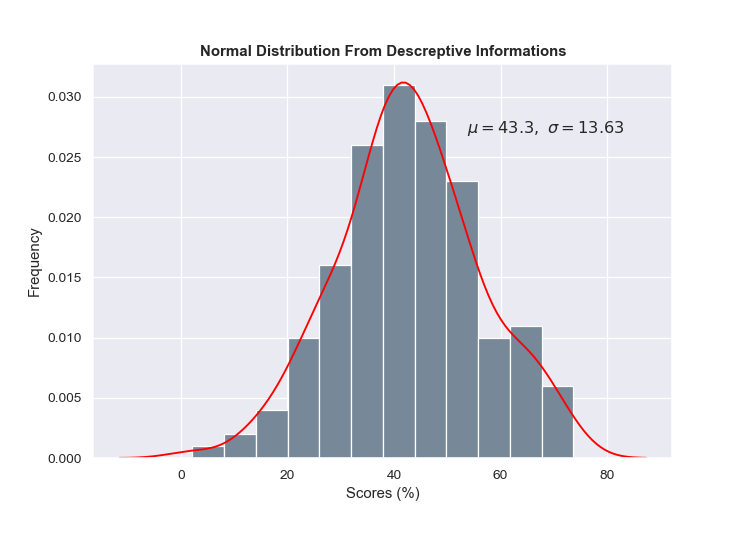

In [32]:
import matplotlib.pyplot as plt
#Ploting normal distribution
#Assuming my data is normally distributed
sns.set_style('darkgrid')
mu = np.mean(survey["Acertos (%)"])
std= np.std(survey["Acertos (%)"])
N = np.count_nonzero(survey["Acertos (%)"])
distribution = np.random.normal(mu,std,N)
plt.figure()
plt.hist(distribution, 12, density=True, facecolor = "lightslategrey", alpha = 1)
sns.kdeplot(distribution, color= 'red')
plt.xlabel("Scores (%)")
plt.ylabel("Frequency")
plt.title('Normal Distribution From Descreptive Informations', fontweight = 'bold')
plt.text(max(distribution)-20,0.027, r'$\mu=43.3,\ \sigma=13.63$', fontweight = 'bold', fontsize = 13)
plt.gcf().set_size_inches(8.3,6)
plt.gcf().set_dpi(100)
plt.subplots_adjust(bottom = 0.15)
plt.show();

In [33]:
print(mu)
print(std)

40.59523809523811
13.386211755196118


In [13]:
#Q-Q Ploting in order to figure out if the dataset fits a standar normal distribution
import statsmodels.graphics.gofplots as stmod
stmod.qqplot(survey['Acertos (%)'], line = 's',  alpha = 0.75, linewidth = 5)
plt.gcf().set_size_inches(7,5)
plt.title('Normal Q-Q Plot', fontweight = 'bold')
plt.show()

NameError: name 'survey' is not defined

In [34]:
#Using Shapiro-Wilk test to evaluate my data population in order to figure out whether or not my sample data proceeds
#a Gaussian distribution
stat,p = stats.shapiro(survey["Acertos (%)"]) 
alpha = 0.05
if  p < alpha:
    print("p-value {} and test statistic {}. The data dont'n follow a Gaussian distribution".format(p, stat))
if p > alpha:
    print("p-value {} and test statistic {}. I can't conclude the data do not follow a Gaussian shape".format(p,stat))

p-value 6.0642223616014235e-06 and test statistic 0.9468953013420105. The data dont'n follow a Gaussian distribution


If my dataset don't follow a normal distribution, them I've less tools suitable to evaluate the correlation between 'Acertos (%)' and 'Escola'. I must probabily use nonparametric tests but before discuss about that let's visualize the distribution of our data related to Schools.

In [35]:
survey = survey.reset_index()
dataset = survey.loc[:,["Escola", "Acertos (%)"]]
dataset.head()

,Escola,Acertos (%)
0,José Inocêncio da Costa,22.666667
1,Henrique Morato,34.666667
2,Jardim Buscardi,28.000000
3,Adelino Bordignon,64.000000
4,Adelino Bordignon,46.666667


<IPython.core.display.Javascript object>


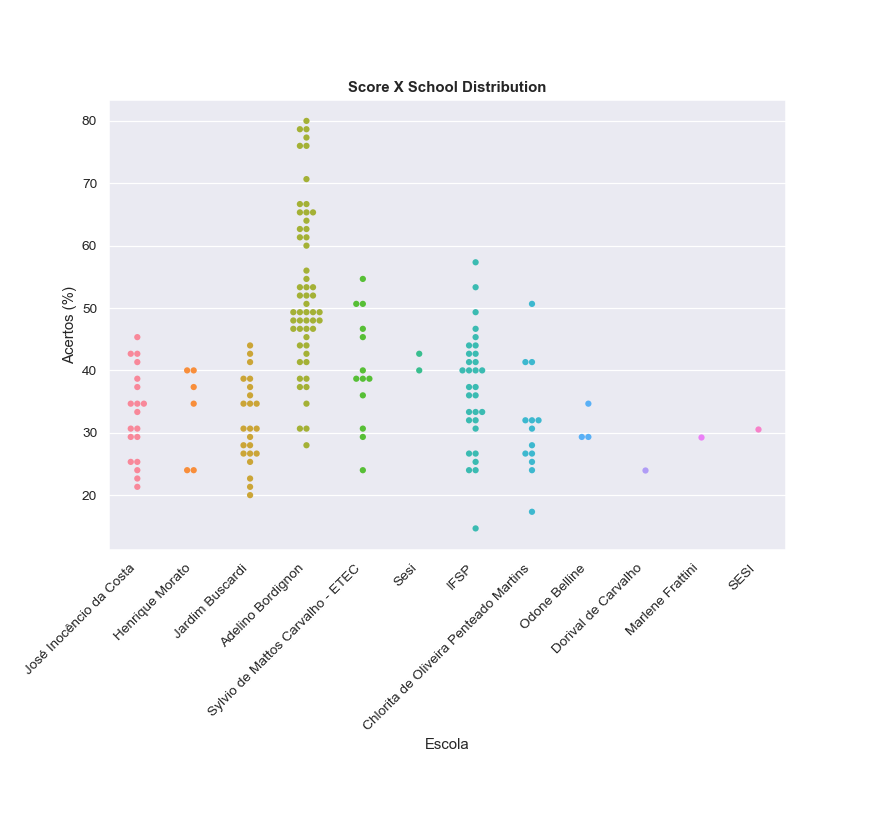

In [36]:
import seaborn as sns
plt.figure()
sns.set(style = "ticks", color_codes = True)
sns.set(rc={'figure.figsize':(9.7,9.27)})
chart = sns.swarmplot(x = "Escola", y = "Acertos (%)", data = dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.title('Score X School Distribution', fontweight = 'bold')
plt.subplots_adjust(bottom = 0.34)
plt.show();

#### One-Way Anova Analysis

When it comes to dataset requirements to use the ANOVA analysis, the support website of  Minitab says that even though the sample is not from a normal population, we can use the one-way ANOVA in case that each sample group is greater than 15 or 20. The test performs very well with skewed and nonnormal distribution, on the other hand, it's not all group that has a sample greater than 15 or 20 but,  even so, the ANOVA test allows using different group sizes.
Let's pick up randomly 16  N from the six largest groups in which two will have 13 N owing to they don't have data enough. Keep in mind groups less than 20 or 15 can result in misleading conclusions with nonnormal distribution, so let's use One way-ANOVA carefully just for studying.
Resourses: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/before-you-start/data-considerations/

In [37]:
# 6 best school 
sixlargest = []
for label,value in destat[("Acertos (%)",'count')].nlargest(6).iteritems():
    sixlargest.append(label)
display(sixlargest)

['Adelino Bordignon',
 'IFSP',
 'Jardim Buscardi',
 'José Inocêncio da Costa',
 'Chlorita de Oliveira Penteado Martins',
 'Sylvio de Mattos Carvalho - ETEC']

In [38]:
#reindexing and queriyng our data frame
survey = survey.sort_values( "Escola", ascending =True).set_index(["Escola", "Nome"]).sort_index(ascending = True)
survey = survey.loc[sixlargest]
survey.head()

index Categoria  Acertos  \
Escola            Nome                                                    
Adelino Bordignon Alan Neves de Melo               3        P1       48   
                  Aline Haints Pastreli            4        P1       35   
                  Ana Clara Custódio da Cunha      8        P1       34   
                  Beatriz Bombonato da Silva      15        P1       50   
                  Beatriz Santana de Oliveira     17        P1       39   

                                               Acertos (%) Cor_Raça  \
Escola            Nome                                                
Adelino Bordignon Alan Neves de Melo             64.000000   Branca   
                  Aline Haints Pastreli          46.666667   Branca   
                  Ana Clara Custódio da Cunha    45.333333   Branca   
                  Beatriz Bombonato da Silva     66.666667   Branca   
                  Beatriz Santana de Oliveira    52.000000   Branca   

                                                            Renda Média(Mês)  \
Escola            Nome                                                         
Adelino Bordignon Alan Neves de Melo           Entre R$ 3000,00 e R$ 4000,00   
                  Aline Haints Pastreli        Entre R$ 2000,00 e R$ 3000,00   
                  Ana Clara Custódio da Cunha  Entre R$ 4000,00 e R$ 5000,00   
                  Beatriz Bombonato da Silva   Entre R$ 3000,00 e R$ 4000,00   
                  Beatriz Santana de Oliveira  Entre R$ 4000,00 e R$ 5000,00   

                                              Leitura Anual (1 a 2)  \
Escola            Nome                                                
Adelino Bordignon Alan Neves de Melo                          3 a 4   
                  Aline Haints Pastreli               Mais do que 4   
                  Ana Clara Custódio da Cunha                 1 a 2   
                  Beatriz Bombonato da Silva          Mais do que 4   
                  Beatriz Santana de Oliveira            Menos de 1   

                                              frequência_teatro_cinema  \
Escola            Nome                                                   
Adelino Bordignon Alan Neves de Melo           Menos que 1 vez por mês   
                  Aline Haints Pastreli            1 a 2 vezes por mês   
                  Ana Clara Custódio da Cunha  Menos que 1 vez por mês   
                  Beatriz Bombonato da Silva   Menos que 1 vez por mês   
                  Beatriz Santana de Oliveira  Menos que 1 vez por mês   

                                                                                Visita em Museus  \
Escola            Nome                                                                             
Adelino Bordignon Alan Neves de Melo           Conheço ou visitei museus apenas por excursões...   
                  Aline Haints Pastreli                                   Não tenho esse costume   
                  Ana Clara Custódio da Cunha                             Não tenho esse costume   
                  Beatriz Bombonato da Silva                              Não tenho esse costume   
                  Beatriz Santana de Oliveira  Conheço ou visitei museus apenas por excursões...   

                                              Espaço ind. estudo Leitura Anual  
Escola            Nome                                                          
Adelino Bordignon Alan Neves de Melo                         Sim     Mais de 2  
                  Aline Haints Pastreli                      Sim     Mais de 2  
                  Ana Clara Custódio da Cunha                Não    Menos de 2  
                  Beatriz Bombonato da Silva                 Sim     Mais de 2  
                  Beatriz Santana de Oliveira                Sim    Menos de 2

In [39]:
#confirming the len of my data frame
np.sum(destat[destat.columns[0]].loc[sixlargest]) == len(survey)

True

In [40]:
#Picking ramdomly samples of size 16 from each school
school = list(survey.index.get_level_values("Escola").unique())
dic = {}
for index in school:
    if index == 'Sylvio de Mattos Carvalho - ETEC':
        dic.setdefault(index,list(survey.loc[index]["Acertos (%)"].sample(n = 13)) +list(np.repeat((np.nan),3)))
    if index == "Chlorita de Oliveira Penteado Martins":
        dic.setdefault(index,list(survey.loc[index]["Acertos (%)"].sample(n = 13)) +list(np.repeat((np.nan),3)))
school.remove('Sylvio de Mattos Carvalho - ETEC')
school.remove("Chlorita de Oliveira Penteado Martins")
for index in school:
        dic.setdefault(index,list(survey.loc[index]["Acertos (%)"].sample(n = 16)))
Samples = pd.DataFrame(dic)
Samples

        


,Chlorita de Oliveira Penteado Martins,Sylvio de Mattos Carvalho - ETEC,Adelino Bordignon,IFSP,Jardim Buscardi,José Inocêncio da Costa
0,32.000000,50.666667,80.000000,33.333333,28.000000,38.666667
1,41.333333,24.000000,46.666667,14.666667,26.666667,21.333333
2,24.000000,38.666667,49.333333,40.000000,34.666667,37.333333
3,50.666667,46.666667,48.000000,24.000000,30.666667,34.666667
4,25.333333,29.333333,65.333333,32.000000,30.666667,25.333333
5,30.666667,36.000000,65.333333,40.000000,42.666667,24.000000
6,32.000000,38.666667,44.000000,41.333333,30.666667,34.666667
7,28.000000,30.666667,56.000000,26.666667,37.333333,25.333333
8,26.666667,45.333333,38.666667,57.333333,41.333333,33.333333
9,41.333333,54.666667,41.333333,41.333333,21.333333,22.666667


<IPython.core.display.Javascript object>


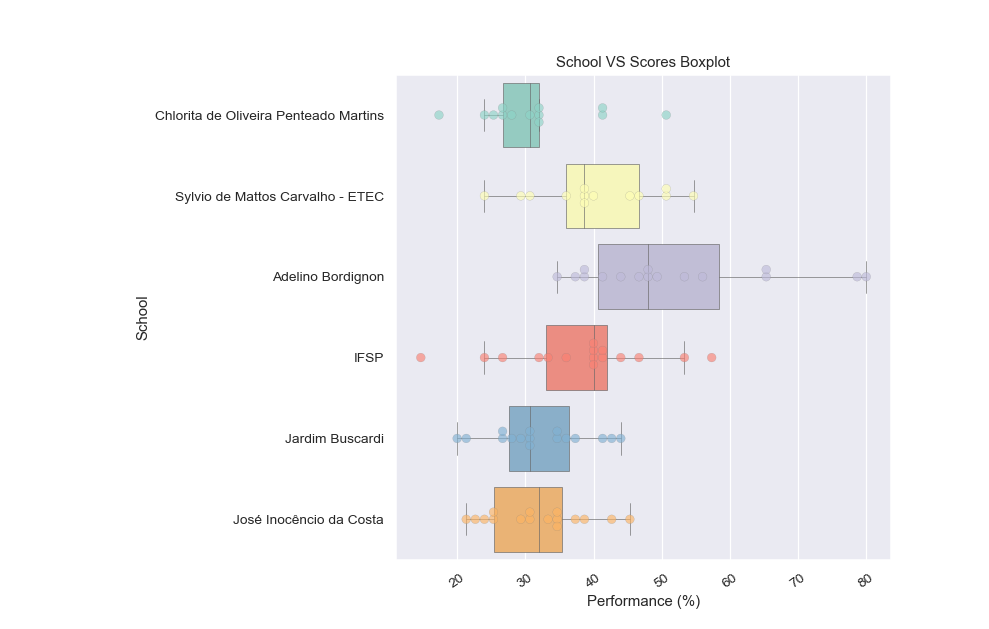

C:\Users\Rodolfo\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Rodolfo\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


In [41]:
#ploting a box-splot chart
plt.figure()
box = sns.boxplot(data = Samples, palette = "Set3", orient = "h", linewidth = 0.5, saturation= 0.76, fliersize= 0)
swarm = sns.swarmplot(data = Samples, palette = 'Set3', orient = 'h', size = 7,
                      alpha= 0.64,
                      edgecolor= 'grey',
                      linewidth = 0.2)
box.set(xlabel = "Performance (%)", ylabel = "School")
plt.title('School VS Scores Boxplot')



#Adjusts
plt.gcf().set_size_inches(11,7)
plt.xticks(rotation = 35)
plt.subplots_adjust(left = 0.4)
plt.show();

In [44]:
Samples.columns

Index(['Chlorita de Oliveira Penteado Martins',
       'Sylvio de Mattos Carvalho - ETEC', 'Adelino Bordignon', 'IFSP',
       'Jardim Buscardi', 'José Inocêncio da Costa'],
      dtype='object')

In [42]:
#One-Way ANOVA
F,p = stats.f_oneway(Samples.iloc[0:13]['Chlorita de Oliveira Penteado Martins'],
               Samples.iloc[0:13]['Sylvio de Mattos Carvalho - ETEC'],
              Samples['Adelino Bordignon'], Samples['Jardim Buscardi'], Samples["José Inocêncio da Costa"], Samples["IFSP"])
alpha = 0.05
if p < alpha:
    print("F = {}, p-value = {}. I reject null hypothesis Ho. At least one popullation mean is different from others".format(F,p))
if p > alpha:
     print("F = {}, p-value = {}. I don't have enough evidence to reject  null hypothesisHo. All population means are statistically equal".format(F,p))
    

F = 9.81596492527574, p-value = 2.05673884127247e-07. I reject null hypothesis Ho. At least one popullation mean is different from others


#### Kruskal Test

It's important to use Kruskal Test to analyze different group means when data considerations for One-way ANOVA were not met even if the power test is lower 

In [43]:
F,p = stats.kruskal(Samples.iloc[0:13]['Chlorita de Oliveira Penteado Martins'],
               Samples.iloc[0:13]['Sylvio de Mattos Carvalho - ETEC'],
              Samples['Adelino Bordignon'], Samples['Jardim Buscardi'], Samples["José Inocêncio da Costa"], Samples["IFSP"])
alpha = 0.05
if p < alpha:
    print("F = {}, p-value = {}. I reject null hypothesis Ho. At least one popullation mean is different of others".format(F,p))
if p > alpha:
     print("F = {}, p-value = {}. I don't have enough evidence to reject  null hypothesisHo. All population means are statistically equal".format(F,p))
    

F = 30.014696758618864, p-value = 1.4650668191330434e-05. I reject null hypothesis Ho. At least one popullation mean is different of others


#### Tukey pairwise comparison